## DATA ANALYSIS

In [34]:
# import all the libraries for data analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, message='.*use_inf_as_na.*')

In [6]:
# Read the dataset
dataframe=pd.read_csv("Dataset/plant_growth_data.csv",encoding='latin-1')
dataframe.head(10)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
5,sandy,8.627622,bi-weekly,none,20.004858,67.618726,0
6,loam,4.444268,daily,organic,25.984533,69.578952,1
7,clay,6.150794,daily,organic,29.291918,69.480907,0
8,loam,4.695214,bi-weekly,none,28.203948,34.560305,1
9,loam,9.178621,weekly,organic,20.598678,54.721015,1


In [21]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [23]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Sunlight_Hours,193.0,6.826484,1.599509,4.033133,5.477000,6.833290,8.241144,9.913903
Temperature,193.0,25.076087,5.354170,15.200000,20.637095,25.912336,29.757938,34.810103
Humidity,193.0,58.098927,12.631799,30.567682,49.300000,59.182806,69.100000,79.648240
Growth_Milestone,193.0,0.497409,0.501294,0.000000,0.000000,0.000000,1.000000,1.000000


Text(0.5, 1.0, 'Growth_Milestone')

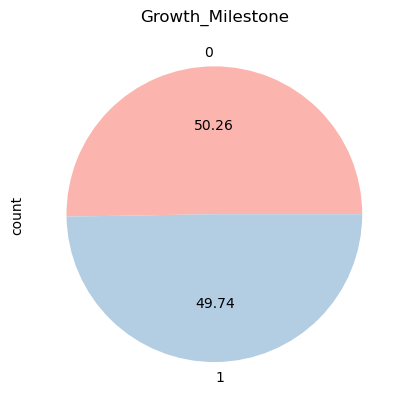

In [51]:
dataframe['Growth_Milestone'].value_counts().plot(kind='pie', autopct='%.2f', colors=plt.get_cmap('Pastel1').colors)
plt.title('Growth_Milestone')

<Axes: >

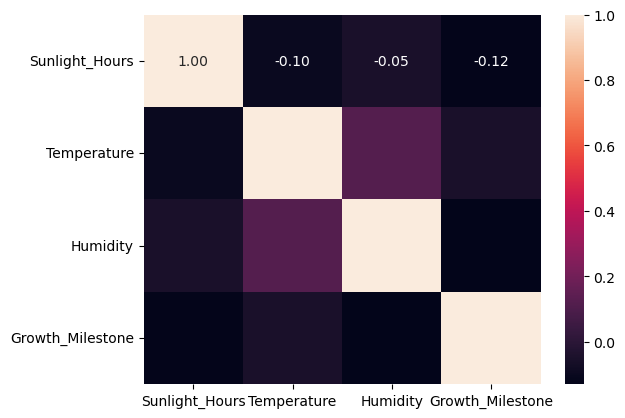

In [18]:
numeric_df = dataframe.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot = True, fmt = '.2f')

<Axes: xlabel='Sunlight_Hours', ylabel='Count'>

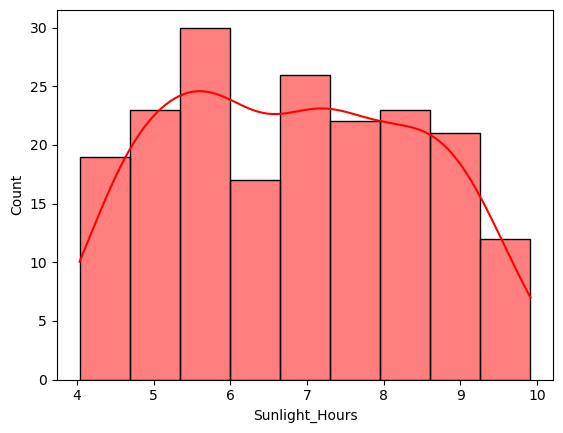

In [36]:
sns.histplot(data=dataframe, x=dataframe["Sunlight_Hours"], kde=True, color="red")

<Axes: xlabel='Temperature', ylabel='Count'>

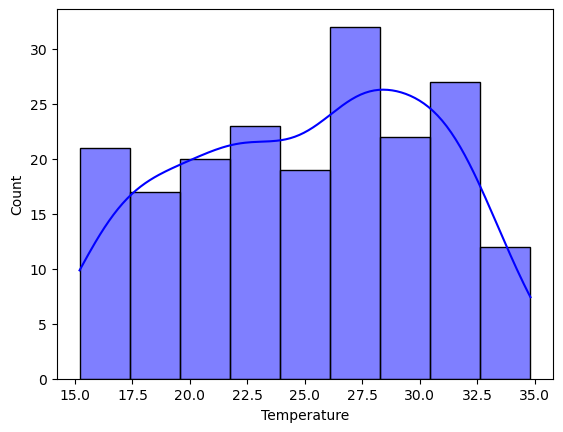

In [41]:
sns.histplot(data=dataframe, x=dataframe["Temperature"], kde=True, color="blue")

<Axes: xlabel='Humidity', ylabel='Count'>

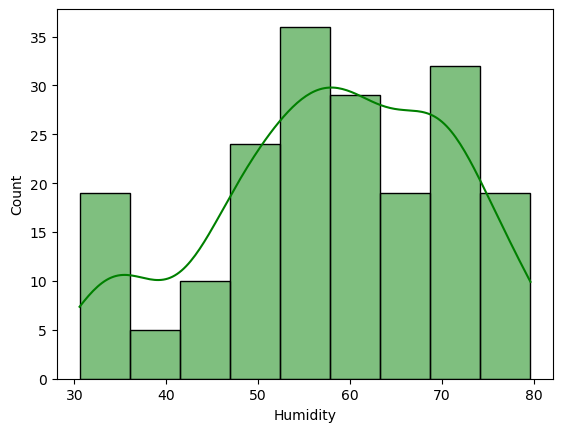

In [47]:
sns.histplot(data=dataframe, x=dataframe["Humidity"], kde=True, color="green")

Text(0.5, 1.0, 'Soil_Type')

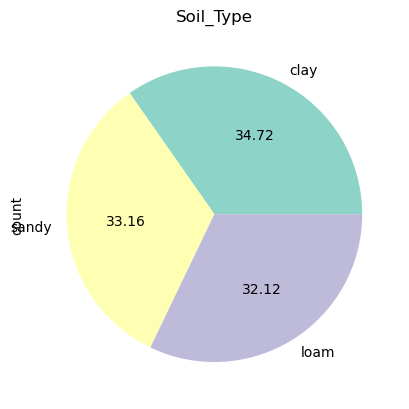

In [49]:
dataframe['Soil_Type'].value_counts().plot(kind='pie', autopct='%.2f', colors=plt.get_cmap('Set3').colors)
plt.title('Soil_Type')

Text(0.5, 1.0, 'Water_Frequency')

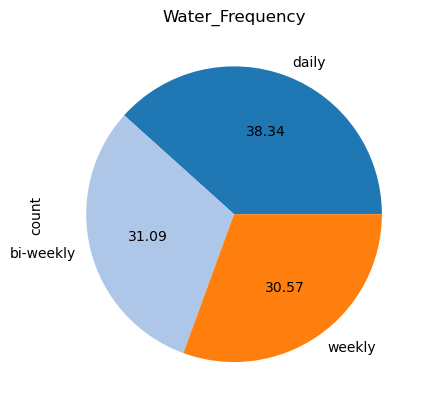

In [55]:
dataframe['Water_Frequency'].value_counts().plot(kind='pie', autopct='%.2f', colors=plt.get_cmap('tab20').colors)
plt.title('Water_Frequency')

## Profile Data

In [65]:
#!pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(dataframe, title="Plant Growth Data Profiling Report")

In [69]:
profile

## Data preprocessing and ml modal

In [75]:
df_encoded = pd.get_dummies(dataframe, drop_first=True)
df_encoded.head(10)

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_none,Fertilizer_Type_organic
0,5.192294,31.719602,61.591861,0,True,False,False,False,False,False
1,4.033133,28.919484,52.422276,1,False,True,False,True,False,True
2,8.892769,23.179059,44.660539,0,True,False,False,False,True,False
3,8.241144,18.465886,46.433227,0,True,False,False,False,True,False
4,8.374043,18.128741,63.625923,0,False,True,False,False,False,True
5,8.627622,20.004858,67.618726,0,False,True,False,False,True,False
6,4.444268,25.984533,69.578952,1,True,False,True,False,False,True
7,6.150794,29.291918,69.480907,0,False,False,True,False,False,True
8,4.695214,28.203948,34.560305,1,True,False,False,False,True,False
9,9.178621,20.598678,54.721015,1,True,False,False,True,False,True


In [77]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sunlight_Hours           193 non-null    float64
 1   Temperature              193 non-null    float64
 2   Humidity                 193 non-null    float64
 3   Growth_Milestone         193 non-null    int64  
 4   Soil_Type_loam           193 non-null    bool   
 5   Soil_Type_sandy          193 non-null    bool   
 6   Water_Frequency_daily    193 non-null    bool   
 7   Water_Frequency_weekly   193 non-null    bool   
 8   Fertilizer_Type_none     193 non-null    bool   
 9   Fertilizer_Type_organic  193 non-null    bool   
dtypes: bool(6), float64(3), int64(1)
memory usage: 7.3 KB


In [79]:
# Define features and target variable
X = df_encoded.drop('Growth_Milestone', axis=1)
y = df_encoded['Growth_Milestone']

In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=2)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=2)

In [95]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [97]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy, conf_matrix, class_report

(0.5897435897435898,
 array([[ 8,  9],
        [ 7, 15]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.53      0.47      0.50        17\n           1       0.62      0.68      0.65        22\n\n    accuracy                           0.59        39\n   macro avg       0.58      0.58      0.58        39\nweighted avg       0.59      0.59      0.59        39\n')